# **Import & Install Library**

In [56]:
import sys

import tensorflow
import pandas as pd
import sklearn as sk
import tensorflow as tf

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
Scikit-Learn 0.24.1
GPU is available
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [2]:
#Import library preprocessing
#from google.colab import files
import time
import random as rd
import zipfile, os # Library untuk mendownload zipfile
from tqdm import tqdm # Sebagai pemanis visual saat mengimport gambar ke dalam array list
import numpy as np  # Library untuk mengubah gambar menjadi array
import tensorflow as tf # Library Tensorflow
from tensorflow.keras.optimizers import RMSprop # Mengimport optimizer untuk model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library untuk Augmentasi gambar
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint # Mengimport learningrate dan model checkpoint
from sklearn.preprocessing import LabelEncoder # Untuk mengubah index menjadi string label
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical # Untuk melabeli gambar
import cv2 # Mengimport gambar

#Import library visualisasi
import matplotlib.image as mpimg  # Library untuk visualisai gambar dengan plot
import matplotlib.pyplot as plt # Library untuk visualisai plot
%matplotlib inline
import seaborn as sns # Library untuk visualisai plot lebih bagus

from sklearn.metrics import confusion_matrix # Untuk evaluasi model

In [3]:
# Install library split_folders
#!pip install split_folders #buat colab
import splitfolders

# **Import Dataset**

Mendownload Dataset Keretakan yang diambil dari Google Images dan telah dimasukkan ke dalam Dropbox

In [4]:
# Mendownload dataset bangunan retak menggunakan wget

# !wget --no-check-certificate \
#   https://dl.dropbox.com/s/dgs42o0l8jpuq34/Bangunan_Retak.zip?dl=2 \
#   -O /tmp/bangunan_retak.zip

In [5]:
# Mengekstrak folder zip yang telah terdownload
#local_zip = '/tmp/bangunan-retak.zip' # colab
# local_zip = 'bangunan_retak.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# #zip_ref.extractall('/tmp') # colab
# zip_ref.extractall()
# zip_ref.close()
 
#base_dir = '/tmp/bangunan-retak' #colab

Folder yang telah terekstrak akan terlihat seperti ini:
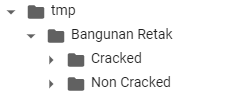

# **Data Preprocessing**

In [6]:
# Memakai library split_folders untuk membagi data train dan validasi
# import splitfolders

# Membagi data train dan validasi dengan perbandingan 80% : 20%
# splitfolders.ratio('/tmp/Bangunan Retak', output="dataset", seed=43, ratio=(.8, .2)) 

# di uncomment trus sekali run aja
#splitfolders.ratio('Bangunan Retak', output="datasets2", seed=43, ratio=(.9, .1))
# splitfolders.fixed('Bangunan Retak', output="datasets", seed=43, fixed=(1000)) # Sekali run aja
# splitfolders.fixed('Bangunan Retak', output="datasets3", seed=43, fixed=(1000), oversample=True) # Sekali run aja

In [8]:
# Menentukan path data train dan validasi
# path = "/content/dataset/" # colab
path = "C:/Users/Alfa/bangkit_program/datasets3/"
train_dir = path + "train/" 
validation_dir = path + "val/"

In [9]:
print(train_dir)
print(validation_dir)

C:/Users/Alfa/bangkit_program/datasets3/train/
C:/Users/Alfa/bangkit_program/datasets3/val/


Splitting akan terlihat seperti gambar di berikut ini:
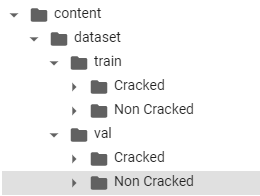

## Memasukkan Data Validasi ke dalam Array List

In [10]:
# print(os.listdir('/tmp/Bangunan Retak')) # colab
print(os.listdir('C:/Users/Alfa/bangkit_program/datasets3/'))

['train', 'val']


In [11]:
X = []
Z = []
# cracked = "/content/dataset/val/Cracked" # colab
# non_cracked = "/content/dataset/val/Non Cracked" # colab
cracked = "C:/Users/Alfa/bangkit_program/datasets3/val/Cracked"
non_cracked = "C:/Users/Alfa/bangkit_program/datasets3/val/Non Cracked"

Mendefinisikan Fungsi untuk memasukkan image ke dalam list array

In [12]:
def assign_label(img, gbk): #gbk gambar ikan
    return gbk

def val_data(gbk,DIR): 
    for img in tqdm(os.listdir(DIR)):
        label= assign_label(img, gbk)
        path= os.path.join(DIR,img)
        img= cv2.imread(path,cv2.IMREAD_COLOR)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Warna menjadi RGB
        img= cv2.resize(img, (224,224)) # ukuran gambar menjadi 150 x 150 pixel
        
        X.append(np.array(img))
        Z.append(str(label))
 
#print(Z)

Menggabungkan Cracked dan Non Cracked ke dalam 1 list

In [13]:
val_data('Cracked', cracked)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 810.11it/s]

1000


In [14]:
val_data('Non Cracked', non_cracked)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 818.76it/s]

2000


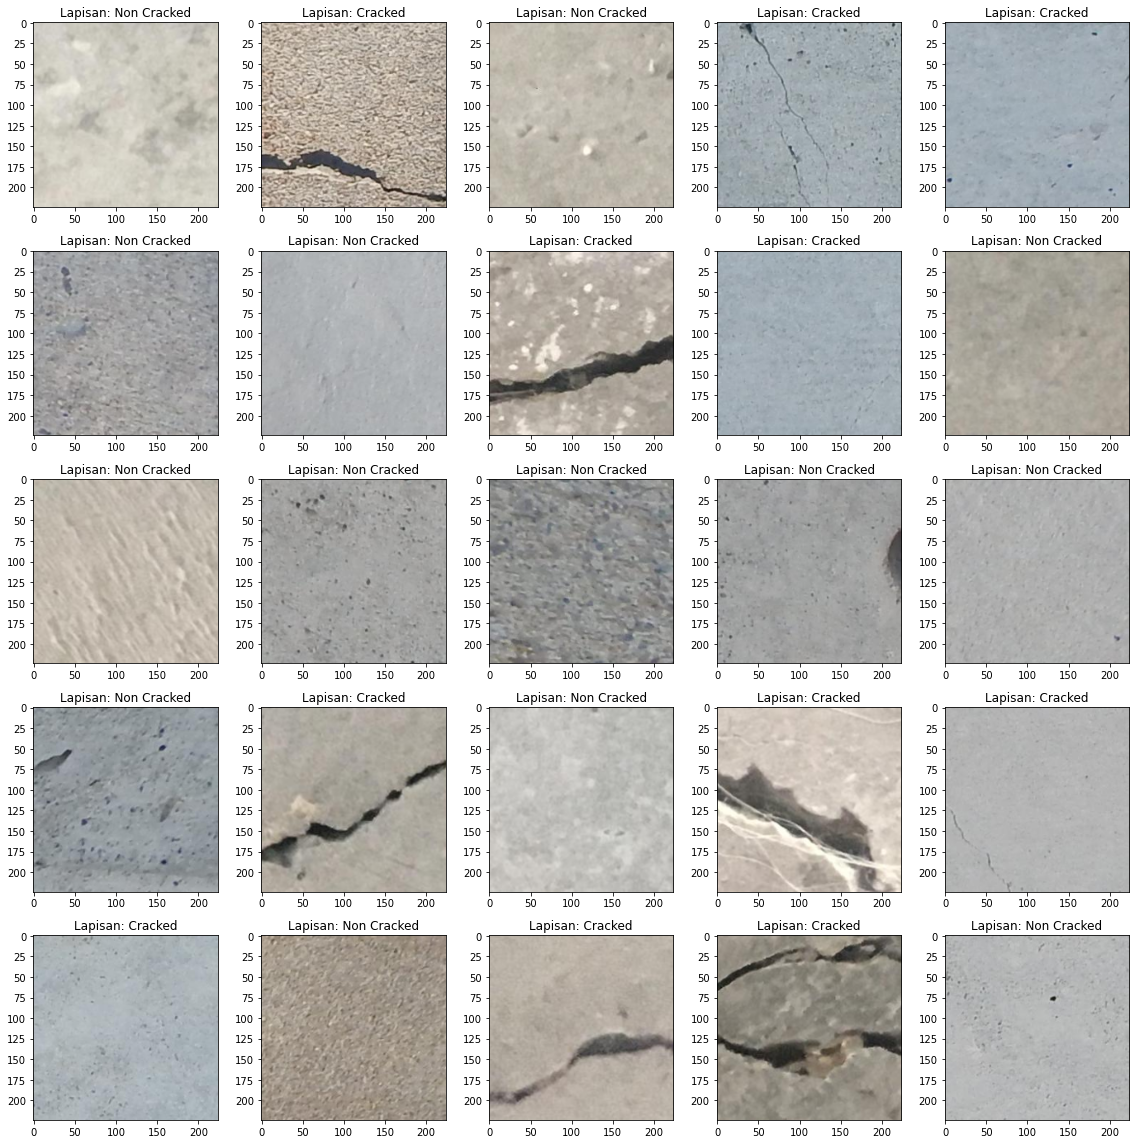

In [15]:
# Menampilkan gambar validasi dengan acak
fig,ax=plt.subplots(5,5)
fig.set_size_inches(16,16)
for i in range(5):
    for j in range (5):
        gamb=rd.randint(0,len(Z))
        ax[i,j].imshow(X[gamb])
        ax[i,j].set_title('Lapisan: '+Z[gamb])
        
plt.tight_layout()

## Augmentasi

Melakukan Augmentasi gambar untuk menciptakan data/gambar baru dari data yang telah ada

In [16]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1, # mengubah zoom image 
                    width_shift_range=0.1,  # mengubah image secara horizontal
                    height_shift_range=0.1, # mengubah image secara vertikal
                    #validation_split=0.15,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False)                
 
test_datagen = ImageDataGenerator(
                    rescale=1./255
                    #,rotation_range=20,
                    #horizontal_flip=True
                    )
                   

In [70]:
batch_size = 256
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(224, 224),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        #batch_size=16, # Model 88%
        class_mode='binary') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'binary'
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(224, 224), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        #batch_size=16 # Model 88%
        shuffle= False,
        class_mode='binary') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'binary'

#train_steps=int(len(train_generator.labels)/batch_size)

Found 133216 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# **Modelling**

In [71]:
# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), '/content/sample_data')

model_name = 'rusak_ringan_weight.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)
# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
                             save_weights_only = True, save_freq=1)

In [72]:
# Inisialisasi class untuk menghentikan proses training apabila akurasi validasi telah diatas 93%
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.92):
            print("\nAkurasi telah mencapai >92%!")
            self.model.stop_training = True
myCallBack = myCallBack()

In [73]:
# def print_in_color(txt_msg,fore_tupple,back_tupple,):
#     #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
#     #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
#     rf,gf,bf=fore_tupple
#     rb,gb,bb=back_tupple
#     msg='{0}' + txt_msg
#     mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
#     print(msg .format(mat), flush=True)
#     print('\33[0m', flush=True) # returns default print color to back to black
#     return


# class LRA(tf.keras.callbacks.Callback):
#     reset=False
#     count=0
#     stop_count=0
#     tepochs=0
#     def __init__(self,model, patience,stop_patience, threshold, factor, dwell, model_name, freeze,batches, initial_epoch):
#         super(LRA, self).__init__()
#         self.model=model
#         self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
#         self.stop_patience=stop_patience
#         self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
#         self.factor=factor # factor by which to reduce the learning rate
#         self.dwell=dwell
#         self.lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it in self.lr
#         self.highest_tracc=0.0 # set highest training accuracy to 0
#         self.lowest_vloss=np.inf # set lowest validation loss to infinity
#         #self.count=0 # initialize counter that counts epochs with no improvement
#         #self.stop_count=0 # initialize counter that counts how manytimes lr has been adjustd with no improvement  
#         self.initial_epoch=initial_epoch 
#         self.batches=batches
#         #self.epochs=epochs
#         best_weights=self.model.get_weights() # set a class vaiable so weights can be loaded after training is completed        
#         msg=' '
#         if freeze==True:
#             msgs=f' Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback'
#         else:
#             msgs=f' Starting training using base model { model_name} training all layers '            
#         print_in_color (msgs, (244, 252, 3), (55,65,80)) 
#     def on_train_begin(self, logs=None):
#         msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
#                                                                                               'V_loss','V_acc', 'LR', 'Next LR', 'Monitor', 'Duration', 'Batch')
#         print_in_color(msg, (244,252,3), (55,65,80)) 
        
#     def on_train_batch_begin(self, batch, logs=None):
#         msg='{0:83s}{1:4s}of {2:5s}'.format(' ', str(batch), str(self.batches))
#         print(msg, '\r', end='') # prints over on the same line to show running batch count
        
        
#     def on_epoch_begin(self,epoch, logs=None):
#         self.now= time.time()
        
#     def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
#         later=time.time()
#         duration=later-self.now 
#         lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
#         current_lr=lr
#         v_loss=logs.get('val_loss')  # get the validation loss for this epoch
#         acc=logs.get('accuracy')  # get training accuracy 
#         v_acc=logs.get('val_accuracy')
#         loss=logs.get('loss')
#         #print ( '\n',v_loss, self.lowest_vloss, acc, self.highest_tracc)
#         if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
#             monitor='accuracy'
#             if acc>self.highest_tracc: # training accuracy improved in the epoch                
#                 self.highest_tracc=acc # set new highest training accuracy
#                 LRA.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
#                 self.count=0 # set count to 0 since training accuracy improved
#                 self.stop_count=0 # set stop counter to 0
#                 if v_loss<self.lowest_vloss:
#                     self.lowest_vloss=v_loss
#                 color= (0,255,0)
#                 self.lr=lr
#             else: 
#                 # training accuracy did not improve check if this has happened for patience number of epochs
#                 # if so adjust learning rate
#                 if self.count>=self.patience -1:
#                     color=(245, 170, 66)
#                     self.lr= lr* self.factor # adjust the learning by factor
#                     tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
#                     self.count=0 # reset the count to 0
#                     self.stop_count=self.stop_count + 1
#                     if self.dwell:
#                         self.model.set_weights(LRA.best_weights) # return to better point in N space                        
#                     else:
#                         if v_loss<self.lowest_vloss:
#                             self.lowest_vloss=v_loss                                    
#                 else:
#                     self.count=self.count +1 # increment patience counter                    
#         else: # training accuracy is above threshold so adjust learning rate based on validation loss
#             monitor='val_loss'
#             if v_loss< self.lowest_vloss: # check if the validation loss improved 
#                 self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
#                 LRA.best_weights=self.model.get_weights() # validation loss improved so save the weights
#                 self.count=0 # reset count since validation loss improved  
#                 self.stop_count=0  
#                 color=(0,255,0)
#                 self.lr=lr
#             else: # validation loss did not improve
#                 if self.count>=self.patience-1:
#                     color=(245, 170, 66)
#                     self.lr=self.lr * self.factor # adjust the learning rate                    
#                     self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
#                     self.count=0 # reset counter
#                     tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
#                     if self.dwell:
#                         self.model.set_weights(LRA.best_weights) # return to better point in N space
#                 else: 
#                     self.count =self.count +1 # increment the patience counter                    
#                 if acc>self.highest_tracc:
#                     self.highest_tracc= acc
#         msg=f'{str(epoch+1):^3s}/{str(LRA.tepochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{self.lr:^9.5f}{monitor:^11s}{duration:^8.2f}'
#         print_in_color (msg,color, (55,65,80))
#         if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
#             msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
#             print_in_color(msg, (0,255,0), (55,65,80))
#             self.model.stop_training = True # stop training

In [74]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(224, 224, 3)),
#     #tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

#     tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

#     tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
#     #tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.3), # agar model tidak overfitting
    
#     tf.keras.layers.Flatten(),
#     #tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 ),
#     tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
#                           activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006) ,activation='relu'), # Hidden layer
# #     tf.keras.layers.Flatten(),  
#     #tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0016), activation='relu'), # Hidden layer
#     tf.keras.layers.Dropout(0.45, seed=123), # agar model tidak overfitting
#     tf.keras.layers.Dense(1, activation='sigmoid') # 2 label output lalu menggunakan sigmoid karena model adalah klasifikasi kategori
# ])

# # model.compile(tf.optimizers.Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 
# model.compile(loss='binary_crossentropy',
#               optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
#               metrics=['accuracy'])

# model.summary()


In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
                          activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006) ,activation='relu'), # Hidden layer
    tf.keras.layers.Dropout(0.45, seed=123), # agar model tidak overfitting
    tf.keras.layers.Dense(1, activation='sigmoid') # 2 label output lalu menggunakan sigmoid karena model adalah klasifikasi kategori
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
              metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 224, 224, 32)      25632     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 112, 112, 64)      51264     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 56, 56, 64)       

In [ ]:
hist=model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa steps yang akan dieksekusi pada setiap epoch
      epochs=300, # jumlah maksimal epoch yang akan di eksekusi
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      callbacks=[myCallBack],#, checkpoint],
      #batch_size=8, # berapa batch yang akan dieksekusi pada setiap epoch
      #validation_steps=5,  
      verbose=1)


Epoch 1/300
35/35 [==============================] - 7s 175ms/step - loss: 6.9364 - accuracy: 0.5375 - val_loss: 3.5395 - val_accuracy: 0.5000
Epoch 2/300
35/35 [==============================] - 6s 169ms/step - loss: 2.8940 - accuracy: 0.5163 - val_loss: 1.4388 - val_accuracy: 0.5000
Epoch 3/300
35/35 [==============================] - 6s 171ms/step - loss: 1.2044 - accuracy: 0.5331 - val_loss: 0.7805 - val_accuracy: 0.5000
Epoch 4/300
35/35 [==============================] - 6s 169ms/step - loss: 0.7440 - accuracy: 0.5212 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 5/300
35/35 [==============================] - 6s 170ms/step - loss: 0.6977 - accuracy: 0.4774 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 6/300
35/35 [==============================] - 6s 175ms/step - loss: 0.6963 - accuracy: 0.4621 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/300
35/35 [==============================] - 6s 174ms/step - loss: 0.6939 - accuracy: 0.4242 - val_loss: 0.6943 - val_accuracy: 0.5010

In [35]:
model.evaluate(validation_generator)

125/125 [==============================] - 2s 15ms/step - loss: 0.3869 - accuracy: 0.8850


[0.38692528009414673, 0.8849999904632568]

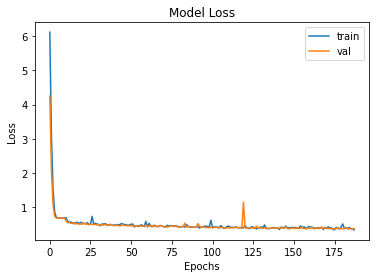

In [36]:
# Menampilkan plot loss dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

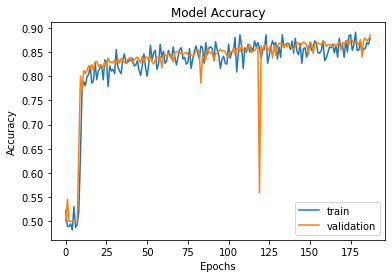

In [37]:
# Menampilkan plot akurasi dari model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Tensorflow yang sudah di training di-convert menjadi tflite menggunakan TFLiteConverter.

In [38]:
saved_model_dir = 'save/model_tflite/' # Membuat directory untuk menuimpan model
tf.saved_model.save(model, saved_model_dir) # Menyimpan model

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # Konversi model menjadi tflite
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:# Membuat model tflite ke dalam directory
    f.write(tflite_model)

INFO:tensorflow:Assets written to: save/model_tflite/assets


# Save Model

In [45]:
# model.save('rusak_ringan.h5') # save model h5
# model.save_weights('weightsModel_rusak_ringan.h5') # save weights model
# model.save('saved_model_rusak_ringan/') # save folder dengan pb

INFO:tensorflow:Assets written to: saved_model_rusak_ringan/assets


Sehingga model tflite akan terlihat seperti ini:
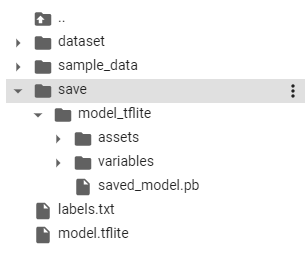

# Load Model

In [48]:
# model = tf.keras.models.load_model('rusak_ringan.h5') # Load Model
# model.load_weights('weightsModel_rusak_ringan.h5') # Load Model Weights
# model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 64)      51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 56, 56, 64)       

# Evaluasi Model

Membuat Label untuk kelas klasifikasi

In [39]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels)

{'Cracked': 0, 'Non Cracked': 1}


In [40]:
#!cat labels.txt # Melihat isi file label berformat txt yang telah dibuat

In [41]:
# Membuat dictionary
dic = {'Cracked': '0', 'Non Cracked': '1'}
Z2 = [dic.get(n, n) for n in Z]

len(Z2)
#print(Z2)

2000

Melabelkan array yang sudah ada di list array

In [42]:
# Melabelkan list Y menjadi 2 kategori
le= LabelEncoder()
Y= le.fit_transform(Z2)
Y= to_categorical(Y,2)

# Merubah List X menjadi Array lalu menormalisasikannya
X_test= np.array(X)
X_test= X_test/255

Evaluasi Model dengan Confusion Matrix, Precision, Recall & F1-Score

[0 0 0 ... 1 1 1]


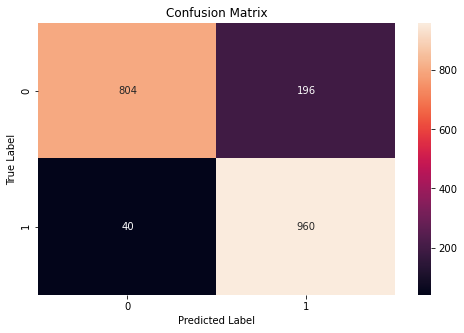

In [49]:
#Mengevaluasi model dengan confussion matrix
from itertools import chain


pred= model.predict(X_test)
y_pred = np.where(pred>0.5, 1, 0)
y_pred = list(chain(*y_pred))
#y_pred = [item.replace(',', '') for item in y_pred]
#y_pred = y_pred.replace(',', '')
#y_pred = [item for sublist in y_pred for item in sublist]
#y_pred= np.argmax(pred, axis=1)
y_true= np.argmax(Y, axis=1)
#y_true = np.where(Y>0.5, 1, 0)
#y_true = [item for sublist in Y for item in sublist]
#print(y_pred)
print(y_true)
cm = confusion_matrix(y_true, y_pred)


f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
# Evaluasi model dengan precision, recall & f1-score
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1000
           1       0.83      0.96      0.89      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



# **Prediksi Model**

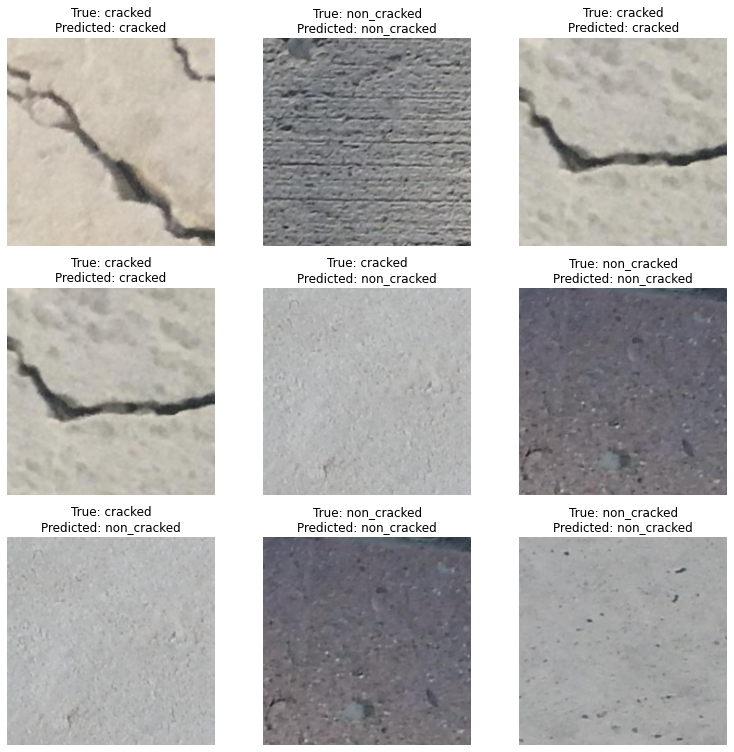

In [67]:
dict_label = {0:'cracked', 1:'non_cracked'}
def predict():
    random_data = np.random.randint(low = 0, high = len(X)-1, size=6)
    sample_images = X_test[random_data]
    sample_label = Y[random_data]
    predicted = model.predict(sample_images) # Memprediksi model
    predicted = np.where(predicted>0.5, 1, 0)
    predicted = [item for sublist in predicted for item in sublist]
    #predicted = np.argmax(predicted, axis=1) # Mengembalikan nilai terbesar dari array prediksi
    true_label = np.argmax(sample_label, axis=1) # Mengembalikan nilai terbesar dari array sample_label
    fig, axs = plt.subplots(3, 3)
    #print(predicted)
    #print(X_test)
    #print(sample_label)
    #print(true_label)
    fig.set_size_inches(13,13)
    for row in range(3):
        for col in range(3):
            if row == 0:
                true = true_label[row+col]
                pred = predicted[row+col]
                axs[row, col].imshow(sample_images[row+col])
            else:
                true = true_label[row+col+1]
                pred = predicted[row+col+1]
                axs[row, col].imshow(sample_images[row+col+1])
            axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
            axs[row, col].axis('off')

predict()

In [33]:
# Mengupload dan memprediksi gambar baru yang telah diupload
# Apabila run pertama error maka harus dirun 2x
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    pred = model.predict(images, batch_size=10)
    classes = np.argmax(pred,axis=1)
  
    print(classes)
    if classes == 0:
      print('cracked')
#     elif classes == 1:
#       print('rusak_berat')
#     elif classes == 2:
#       print('rusak_sedang')  
    else :
      print('non_cracked')
  

NameError: name 'files' is not defined